# A Global Analysis of Earth's  Biosphere

In [45]:
# import the necessary packages
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import numpy as np
import pandas as pd
from mpl_toolkits import mplot3d
import matplotlib.ticker as mtick

## Sample Data

In [6]:
environ = gpd.read_file('update_temperature.csv')
environ.head()

,Year,Country,Avg_Temperature_degC,CO2_Emissions_tons_per_capita,Sea_Level_Rise_mm,Rainfall_mm,Population,Renewable_Energy_pct,Extreme_Weather_Events,Forest_Area_pct
0,2000,United States of America,13.5,20.2,0,715,282500000,6.2,38,33.1
1,2000,China,12.8,2.7,0,645,1267000000,16.5,24,18.8
2,2000,Germany,9.3,10.1,0,700,82200000,6.6,12,31.8
3,2000,Brazil,24.9,1.9,0,1760,175000000,83.7,18,65.4
4,2000,Australia,21.7,17.2,0,534,19200000,8.8,11,16.2


## To what extent have humans impacted the environment?

### Changes in Earth's Population Over Time

This data visualization is being used to look at the differences in the population of the earth over time because it would be interesting to provide this information as an introduction to the dataset. Also, humans and the Earth live in tandem with one another, and they take a lot of the earth's resources, and it would be interesting to see how earth has helped humans thrive over time. The top 5 countries populations are used in the data set due to the way the data set was done, where only the data only has data for every 5 years, and these are the countries that have the most populations, so seeing their changes over time would be interesting.

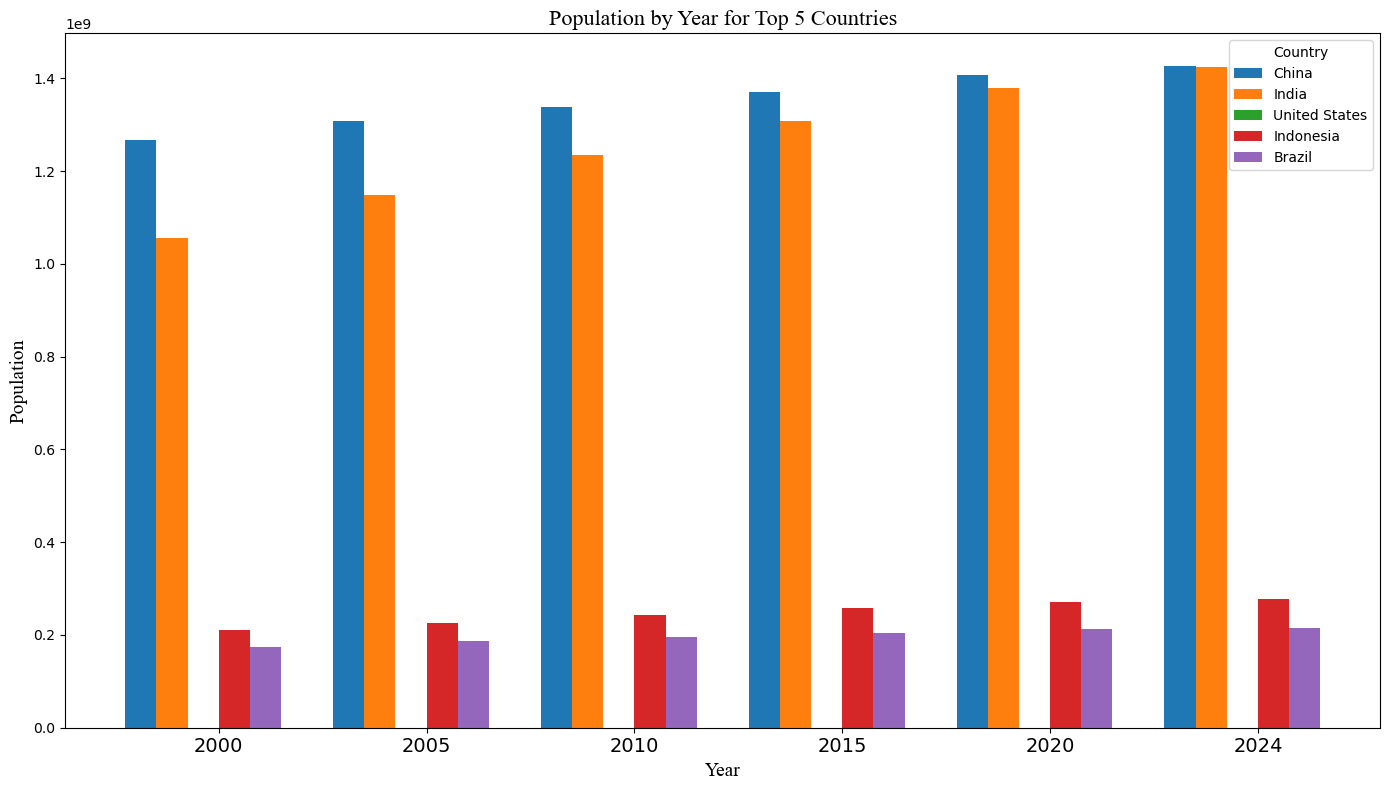

In [28]:
df = pd.read_csv('update_temperature.csv')
#Convert the year of the dataset to a string so that you can it can be used as a label and category
df['Year'] = df['Year'].astype(str)

#Define the top countries in terms of population
top5Countries = ['China', 'India', 'United States', 'Indonesia', 'Brazil']

#Find the top 5 countries in the original dataset to plot the population
dfTop5 = df[df['Country'].isin(top5Countries)]

#Create an array with the countries and years
years = sorted(dfTop5['Year'].unique())
countries = top5Countries

#Variables needed for the width and the x-axis
barWidth = 0.15
x = range(len(years))

#Create the plot
fig = plt.figure(figsize=(14, 8))

#Create the bar plots
for i, country in enumerate(countries):
    countryData = dfTop5[dfTop5['Country'] == country] #find the country
    countryPop = [countryData[countryData['Year'] == year]['Population'].values[0] #Load its population
                  #Go through each year nat if year not there make population zero
                   if not countryData[countryData['Year'] == year].empty else 0 
                   for year in years]
    barPositions = [pos + i * barWidth for pos in x]
    plt.bar(barPositions, countryPop, width=barWidth, label=country)

#Center the bars
midBarPositions = [pos + (barWidth * len(countries)) / 2 for pos in x]
plt.xticks(midBarPositions, years, fontsize=14)

#Fix up the plot
plt.xlabel('Year',fontname='Times New Roman',fontsize=14)
plt.ylabel('Population', fontname='Times New Roman',fontsize=14)
plt.title('Population by Year for Top 5 Countries', fontname='Times New Roman',fontsize=16)
plt.legend(title='Country')
plt.tight_layout()
plt.show()

### Observations

This plot is designed to show the way that countries' populations are steadily increasing, highlighting the top countries due to them having more inhabitants to watch over. Looking at this graph, you can see how China and India are way ahead of the rest when it comes to population; the only other country that comes close is the USA. India also seems to have rapidly grown in terms of population at a rapid pace, while other countries seem to have had a steady increase in population. The United States and Brazil also seem to have had the least noticeable increase in population, as it looks like it has almost stayed the same, while in other countries you can clearly see the increase in their population over the years.

### How Population Affects the Amount of CO2 Emissions

This data visualization is done to show if the amount of population in a country has any correlation with the number of people living in a country due to CO2 emissions having many causes that are not only involving humans. The data points are also color coded based on the country because it is interesting to see if this clustering of data could also be a regional issue.

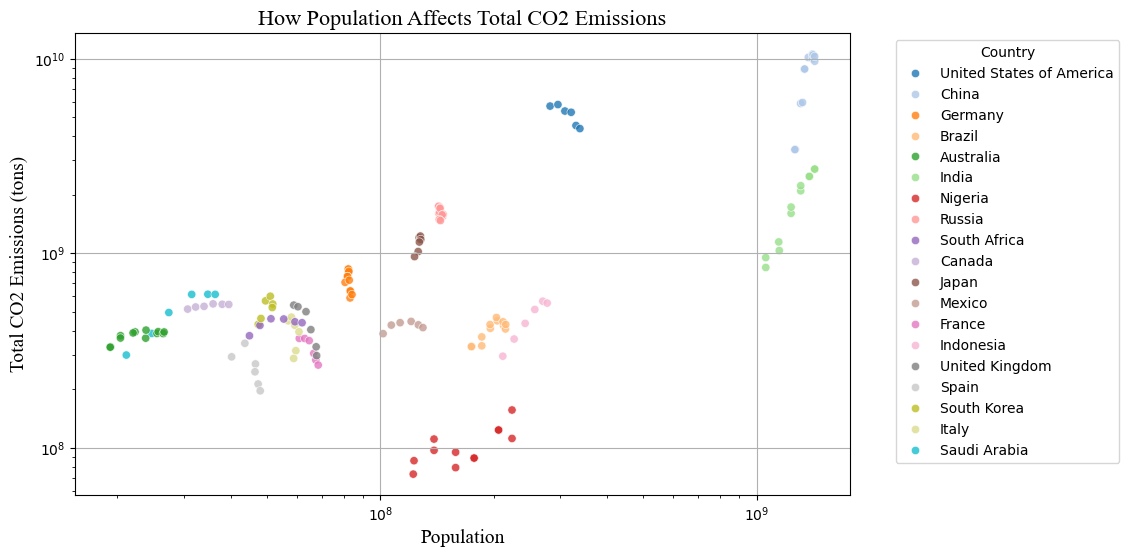

In [34]:
#Calculate the total CO2 emissions per country
df['Total_CO2_Emissions'] = df['Population'] * df['CO2_Emissions_tons_per_capita']

#Make scatterplot with color coding by country
fig = plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Population', y='Total_CO2_Emissions', hue='Country', palette='tab20', alpha=0.8)

# Add titles and labels
plt.title('How Population Affects Total CO2 Emissions', fontname='Times New Roman', fontsize=16)
plt.xlabel('Population', fontname='Times New Roman', fontsize=14)
plt.ylabel('Total CO2 Emissions (tons)', fontname='Times New Roman', fontsize=14)
#Scale the graph
plt.xscale('log')
plt.yscale('log')
#Move legend outside
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Country')
plt.grid(True)
plt.show()

### Observations

This scatter plot's clustering gives some interesting insights, for example, how the United States' CO₂ emissions are seeming to decrease as its population is increasing. It also does seem like the population of a country has an effect on its CO₂ emissions because there are countries like China, India, Indonesia, Nigeria, etc., where, as their population increases, the amount of CO₂ emissions they cause also seems to increase. There is another interesting thing to note, which is that the population of a country does not seem to be the cause behind their CO₂ emissions because there are countries that have a lower population than others but still have high CO₂ emissions. Also, it is interesting to see how the United States has a much lower population than India, as previously seen, but still manages higher CO₂ emissions.

### How Population Affects Forest Area Percentage

This data visualization is done to see the relationship between the population of a country and the amount of forest area due to humans needing actual space in an area to live in and using many resources of a forest for the area for many different things in everyday life.

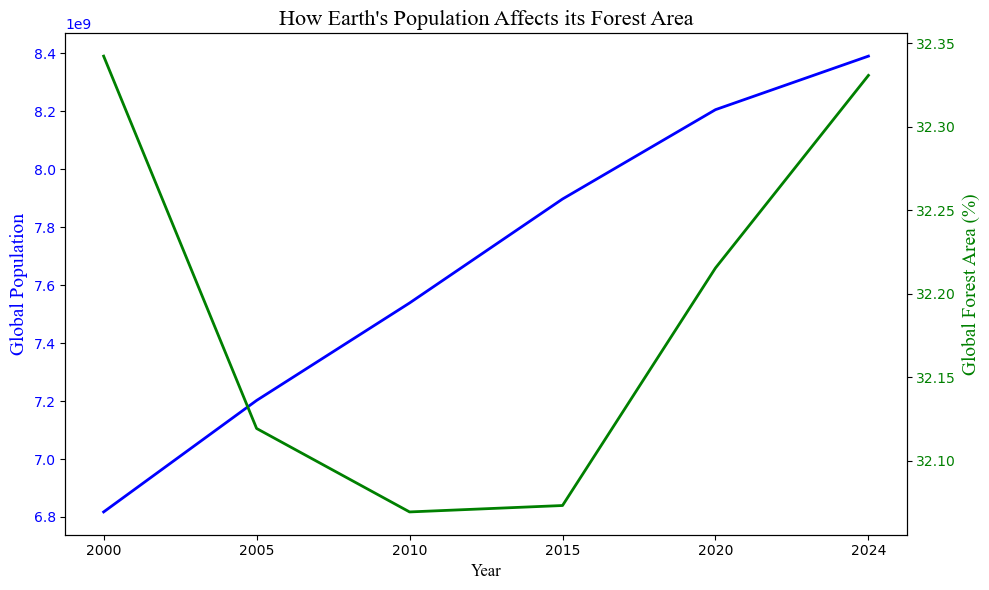

In [40]:
#Create two datasets for the sum of the populations and forest area percentage for each country for every year 
globalPopulation = df.groupby('Year')['Population'].sum().reset_index()
globalForestArea = df.groupby('Year')['Forest_Area_pct'].mean().reset_index()

#Megre the data by the year for each set
mergeData = pd.merge(globalPopulation, globalForestArea, on='Year')

#Create the plot
fig, ax1 = plt.subplots(figsize=(10, 6))

#Plot Global Population on the left y axis
sns.lineplot(data=mergeData, x='Year', y='Population', ax=ax1, color='blue', linewidth=2)
ax1.set_xlabel('Year', fontname='Times New Roman',fontsize=12)
ax1.set_ylabel('Global Population', color='blue', fontname='Times New Roman',fontsize=14)
ax1.tick_params(axis='y', labelcolor='blue')

#Plot the Forest Area percent on the right y-axis
ax2 = ax1.twinx() #Plotted oin the same plot  
sns.lineplot(data=mergeData, x='Year', y='Forest_Area_pct', ax=ax2, color='green', linewidth=2)
ax2.set_ylabel('Global Forest Area (%)', color='green', fontname='Times New Roman',fontsize=14)
ax2.tick_params(axis='y', labelcolor='green')

#Fix up the plot
plt.title("How Earth's Population Affects its Forest Area",  fontname='Times New Roman',fontsize=16)
plt.tight_layout()
plt.show()

### Observations

Some insights that this graph could be useful to take note of are that the global percentage of the forest population does not seem to change much throughout the years and stays in a set range. Also, there seems to be a dip in the percentage of the forest population between 2005 and 2015, which could be due to the overpopulation of the country increasing during that time, which could have been the cause of humans needing to occupy more land and resources that the forest acquired. An increase in the population of the forest percentage is also something positive to note due to the overall population of the earth still increasing, showing that humans could be doing something for the earth to help combat the harm they have done.

## How has the Earth's climate changed over time?

### Choropleth Map of Temperature Changes in Different Countries

In [8]:
# load the low resolution world map
world = gpd.read_file('ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp')
# Print sample data
world.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312..."


<Axes: >

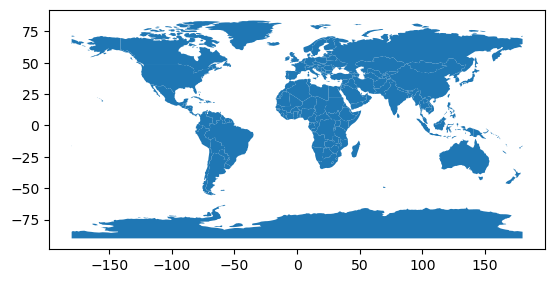

In [10]:
# Plot sample map
world.plot()

This visual aims to show which countries have seen the greatest changes in average temperature. This was done by grouping the country and year attributes, and deriving a 'Temp_Increase' attribute which is the difference in the average temperatures in 2024 and 2000. The countries that have seen the most increase will be closer to a red color while countries that have seen an increase but not quite as much as others will be closer to a blue color. Countries with no available data are left white.

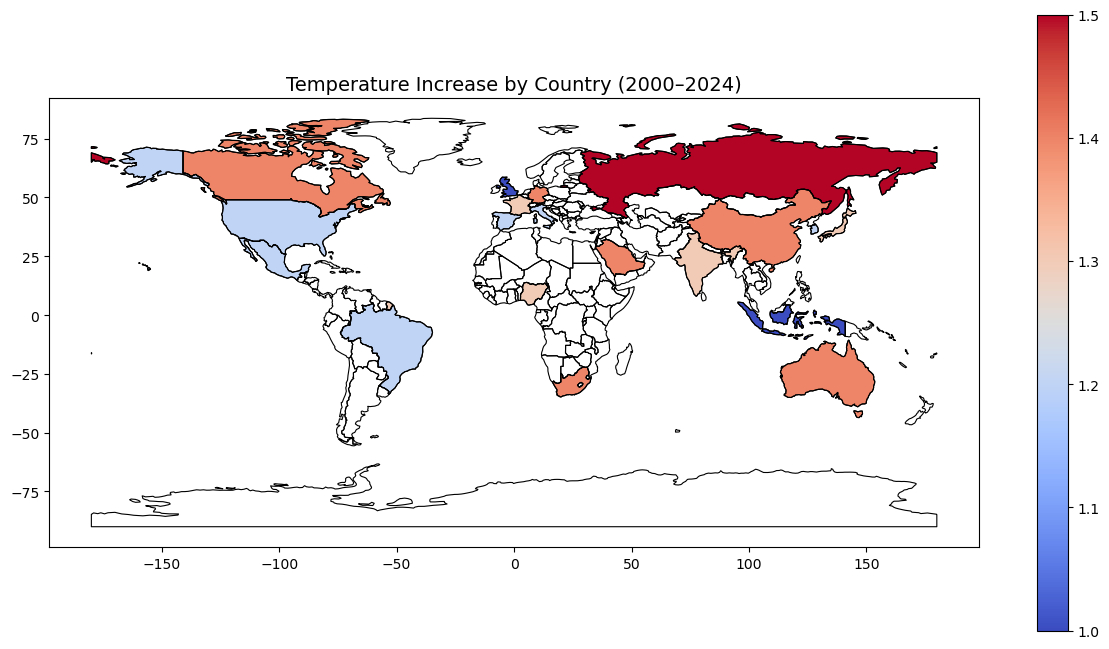

In [12]:
# Make sure year/temp are readable numbers
environ['Year'] = environ['Year'].astype(int)
environ['Avg_Temperature_degC'] = environ['Avg_Temperature_degC'].astype(float)
# Group by country and year
grouped = environ.groupby(['Country', 'Year'])['Avg_Temperature_degC'].mean().unstack()
grouped.columns = grouped.columns.astype(int)

# Create attribute to hold the change in temperature between 2000 and 2024
grouped['Temp_Increase'] = grouped[2024] - grouped[2000]
temp_df = grouped[['Temp_Increase']].reset_index()

# Prepare for merge
temp_df = temp_df.set_index('Country')

# Drop temp increase to allow cell rerun
if 'Temp_Increase' in world.columns:
    world = world.drop(columns=['Temp_Increase'])

# Merge
worldMerged = world.merge(temp_df, how='left', left_on='NAME', right_index=True)

# Create figure and axis
fig, ax = plt.subplots(1, 1, figsize=(15, 8))

# Plot the map with temp increase attribute
world.boundary.plot(ax=ax, linewidth=0.8, edgecolor='Black')
worldMerged.plot(column='Temp_Increase', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='Black', legend=True)
ax.set_title('Temperature Increase by Country (2000–2024)', fontsize=14)
plt.show()

### Observations

Out of all the countries the dataset provides data for, Russia has seen the most increase in average temperatures between 2000 and 2024. Indonesia and the United Kingdom have seen the least amount of temperature increases.
<br>What could contribute to this..?
- Emissions
- Energy Usage
- Climate Zone
- Government Policies

### 3D Scatter Plot of Average Global Temperatures and Sea Level Rise Over Time

This visual aims to show how sea level rise may correlate with average temperatures. Utilizing a 3D scatter plot allows easy viewing of the global temperatures and sea level rise as time passes. The visual has year plotted on the x-axis while the y and z labels show the average temperature and sea level rise.

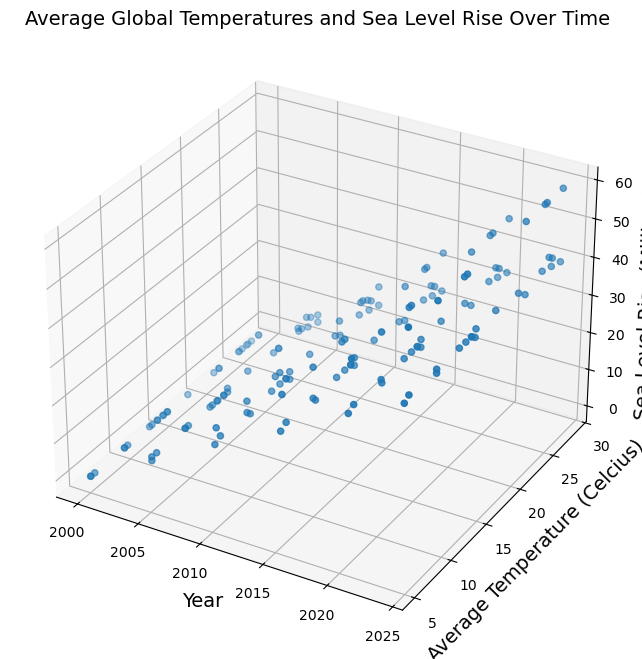

In [16]:
data = pd.read_csv('update_temperature.csv')
# Create figure and axis
fig = plt.figure(figsize = (15, 8))
ax = plt.axes(projection='3d')
# Plot the year, avg temp, and sea level rise data
ax.scatter(data['Year'], data['Avg_Temperature_degC'], data['Sea_Level_Rise_mm'])
# Set labels
ax.set_xlabel('Year', fontsize = 14)
ax.set_ylabel('Average Temperature (Celcius)', fontsize = 14)
ax.set_zlabel('Sea Level Rise (Millimeter)', fontsize = 14)
ax.set_title('Average Global Temperatures and Sea Level Rise Over Time', fontsize = 14)
plt.show()

### Observations

The visual shows an upward trend in temperature and sea level rise as years pass by. This trend can suggest increases in temperature correlates to rising sea levels due to increased temperatures having an impact on glaciers and ice sheets.

### Heatmap of Annual CO2 Emissions per Capita in Each Country

This visual aims to show which countries have seen the most CO2 emissions per capita annually. Lighter colors indicate greater amounts of CO2 emissions while darker colors indicate fewer amounts of CO2 emissions.

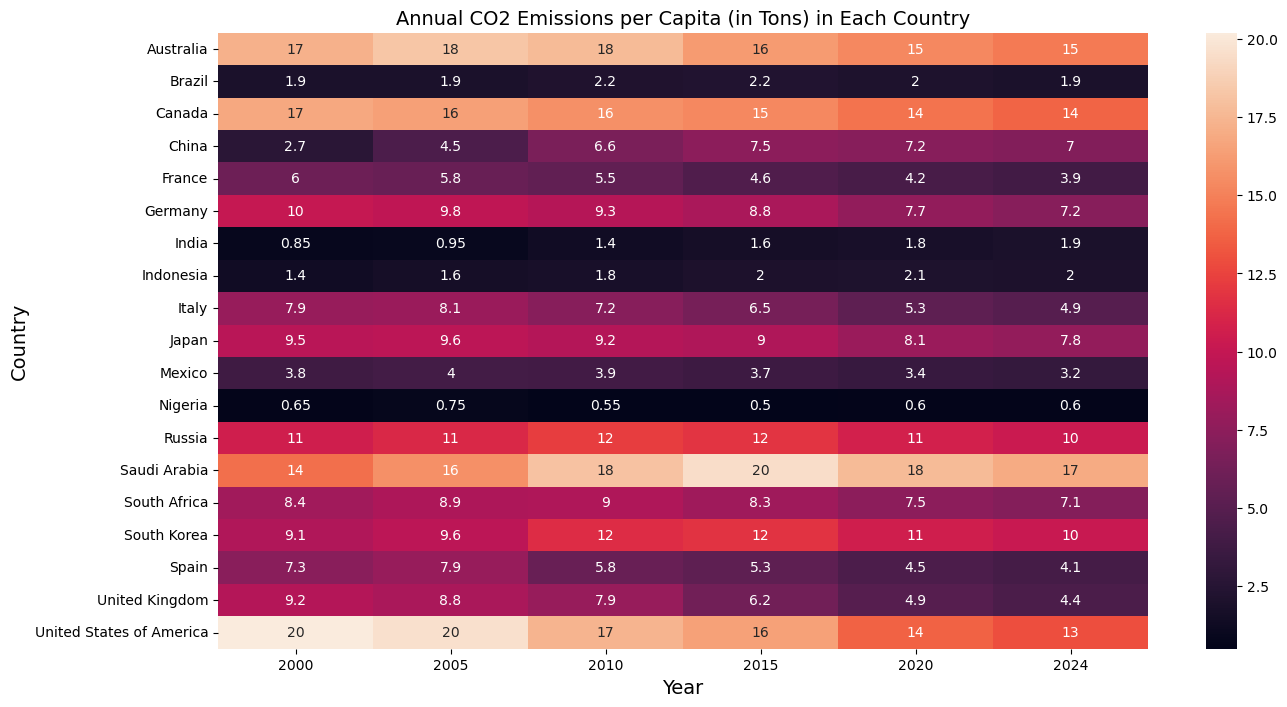

In [22]:
# Create a pivot table to easily put into a seaborn heatmap
dataPivot = data.pivot_table(index = 'Country', columns = 'Year', values = 'CO2_Emissions_tons_per_capita')
# Create the figure
fig = plt.figure(figsize = (15, 8))
# Create heat map
sns.heatmap(dataPivot, annot = True)
# Set labels
plt.ylabel('Country', fontsize = 14)
plt.xlabel('Year', fontsize = 14)
plt.title('Annual CO2 Emissions per Capita (in Tons) in Each Country', fontsize = 14)
plt.show()

### Observations

The heatmap shows the countries that have the least CO2 emissions per capita include Brazil, India, Indonesia, and Nigeria. Countries that see the most CO2 emissions per capita include the United States of America, Australia, China, and Saudi Arabia. The U.S. has seen improvements in CO2 emissions per capita since 2000 which could suggest the country saw an increase in climate policies. The countries that see low amounts of CO2 emissions per capita can suggest economic development has a role in CO2 emissions.

## Have sustainability efforts made any impacts on the fight for a greener future?

### Visualization 1

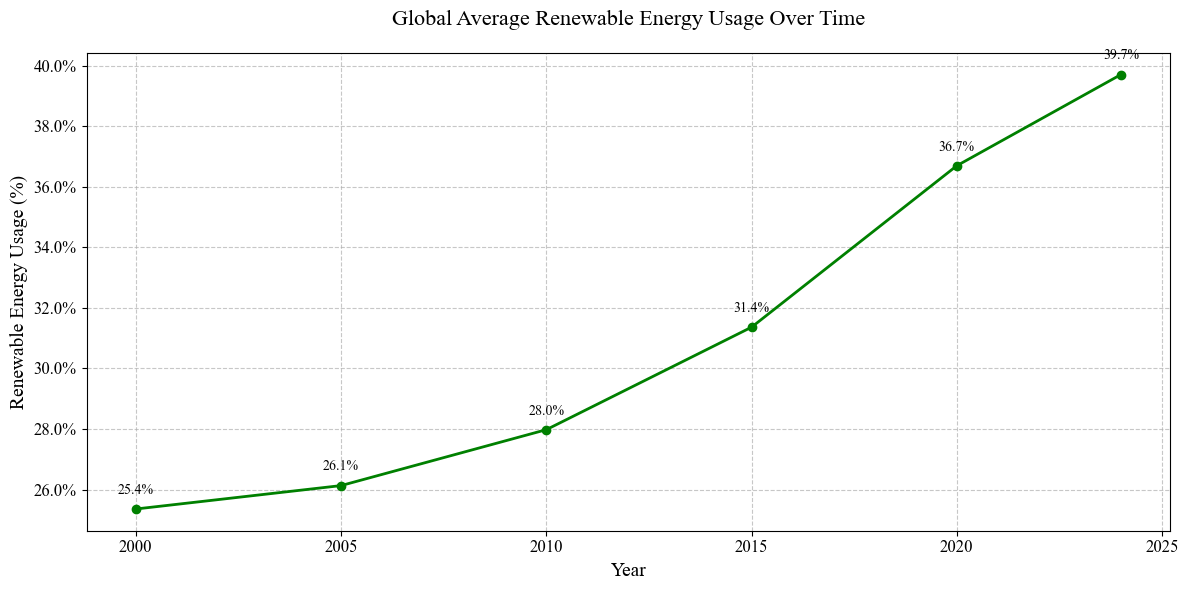

In [49]:
# Load the dataset
temperature_df = pd.read_csv("update_temperature.csv")

# Compute global average renewable energy usage per year
global_renewable_trend = temperature_df.groupby("Year")["Renewable_Energy_pct"].mean().reset_index()

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(global_renewable_trend["Year"], global_renewable_trend["Renewable_Energy_pct"], 
         marker='o', linewidth=2, color='green')

# Annotate data points
for i, row in global_renewable_trend.iterrows():
    plt.text(row["Year"], row["Renewable_Energy_pct"] + 0.5, 
             f"{row['Renewable_Energy_pct']:.1f}%", 
             ha='center', fontsize=10, fontname='Times New Roman')

# Customize plot styling with additional padding for the title
plt.title("Global Average Renewable Energy Usage Over Time", 
          fontsize=16, fontname='Times New Roman', pad=20)
plt.xlabel("Year", fontsize=14, fontname='Times New Roman')
plt.ylabel("Renewable Energy Usage (%)", fontsize=14, fontname='Times New Roman')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12, fontname='Times New Roman')
plt.yticks(fontsize=12, fontname='Times New Roman')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())

plt.tight_layout()
plt.show()

### Method

- Missing data handling: Assumes records with missing Renewable_Energy_pct are automatically excluded during aggregation (handled by default with mean()).
- Grouping: The data is grouped by calendar year using groupby("Year"), which aggregates all countries' renewable energy values for each year.
- Aggregation: For each year, the mean of Renewable_Energy_pct is calculated to represent the global average.
Ensures statistically representative view of global renewable energy trends, with:
- Clear temporal structure
- Quantitative labeling
- Careful formatting
- Rigorous averaging
Supports policy tracking, progress evaluation, and public communication in energy transition discussions.

### Explanation

This line chart illustrates the global trend of average renewable energy usage as a percentage of total energy consumption over time. Each point on the line represents a year’s global average, computed across all countries in the dataset. Data points are clearly annotated with percentage values to emphasize annual changes. The green line represents an upward trajectory of global renewable adoption. The x-axis shows the year, and the y-axis is formatted as a percentage scale, making it easier to interpret relative growth.

There is a consistent upward trend, indicating global efforts to transition toward cleaner energy sources are gradually succeeding. The slope of the line varies by year, suggesting that some years saw more significant improvements than others, possibly reflecting key policy changes, global agreements, or technological advancements. The year-to-year annotations help detect inflection points where the rate of adoption may have accelerated or plateaued.

This visualization provides a macro-level view of the planet’s renewable energy trajectory, a vital indicator in the face of climate change. It helps answer questions like:
- Are we progressing fast enough toward sustainability goals?
- Are global investments and policies translating into tangible energy shifts?<br>By showing clear and accessible trends with data labels, this graphic supports data-driven climate advocacy and international policy benchmarking.

### Visualization 2

C:\Users\rubyr\AppData\Local\Temp\ipykernel_11084\350295158.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(


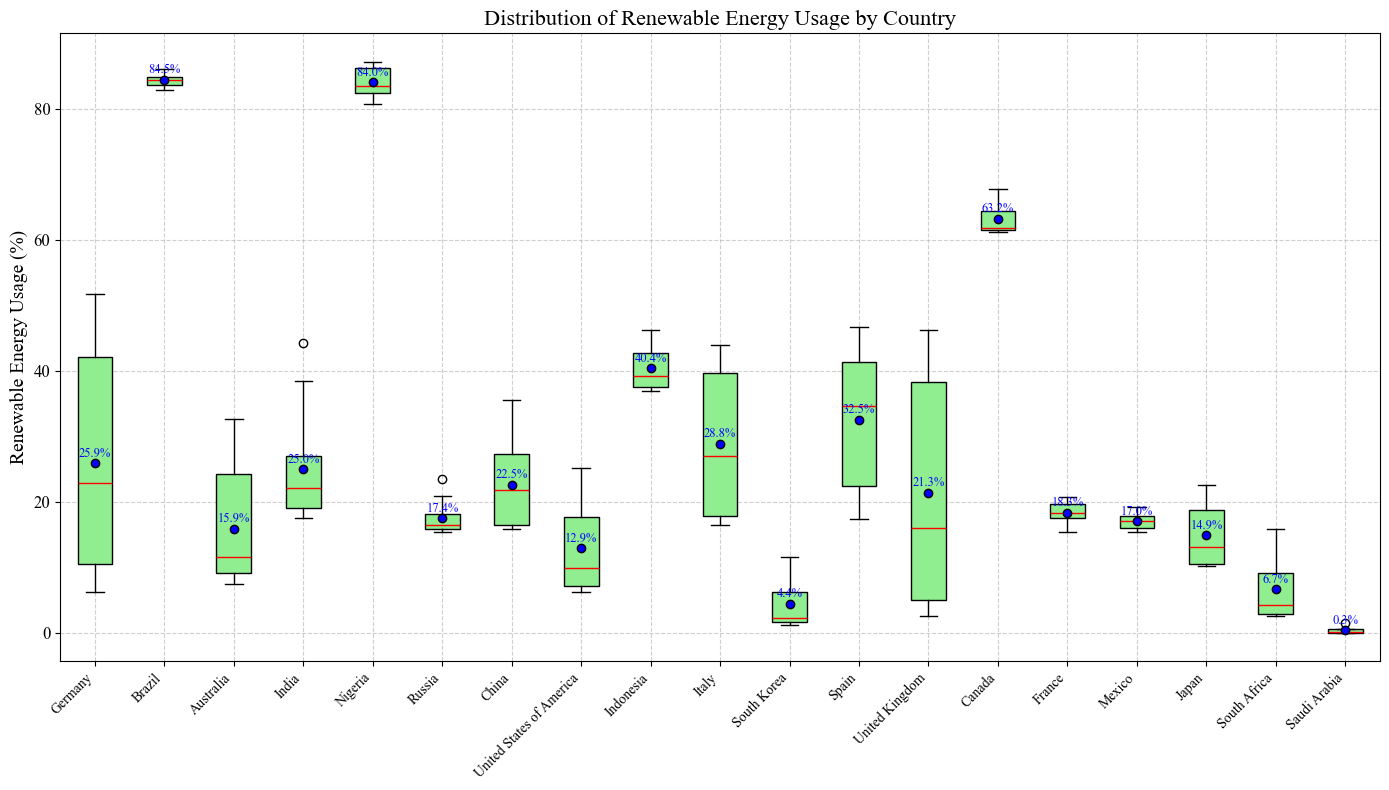

In [51]:
# Filter countries with at least 5 entries to ensure meaningful box plots
country_counts = temperature_df['Country'].value_counts()
eligible_countries = country_counts[country_counts >= 5].index
filtered_df = temperature_df[temperature_df['Country'].isin(eligible_countries)]

# Create the box plot
plt.figure(figsize=(14, 8))
box = plt.boxplot(
    [filtered_df[filtered_df['Country'] == country]['Renewable_Energy_pct'] for country in eligible_countries],
    patch_artist=True,
    labels=eligible_countries,
    showmeans=True
)

# Customize colors for better visibility and annotation
for patch in box['boxes']:
    patch.set_facecolor('lightgreen')
for median in box['medians']:
    median.set_color('red')
for mean in box['means']:
    mean.set_marker('o')
    mean.set_markerfacecolor('blue')
    mean.set_markeredgecolor('black')

# Add text annotations for the mean values
for i, country in enumerate(eligible_countries):
    country_data = filtered_df[filtered_df['Country'] == country]['Renewable_Energy_pct']
    mean_val = country_data.mean()
    plt.text(i + 1, mean_val + 1, f"{mean_val:.1f}%",
             ha='center', fontsize=9, fontname='Times New Roman', color='blue')

# Set titles and labels with consistent styling
plt.title("Distribution of Renewable Energy Usage by Country", fontsize=16, fontname='Times New Roman')
plt.ylabel("Renewable Energy Usage (%)", fontsize=14, fontname='Times New Roman')
plt.xticks(rotation=45, ha='right', fontsize=10, fontname='Times New Roman')
plt.yticks(fontsize=12, fontname='Times New Roman')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Method

To ensure statistical significance and avoid misrepresentations:
- Only countries with at least five data entries are included
- This threshold filters out sparsely represented countries, enhancing visual clarity and data integrity

<br> A box plot is used to visualize the distribution of renewable energy usage for each eligible country.
<br> Each box includes:
- Green patch: the interquartile range (IQR, 25th to 75th percentile)
- Red line: the median (50th percentile)
- Whiskers: extend to the minimum and maximum values within 1.5 IQR
- Dots (if present): outliers
- Blue circle: the mean, shown with a custom marker

<br> Each box plot is styled for clarity:
- Green fill to signify sustainability
- Red medians and blue means to distinguish statistical markers
- Mean values are annotated above each box using plt.text():

<br> Visualization uses rigorous statistical filtering and detailed annotations to clearly show:
- The spread, central tendency, and variability of renewable energy adoption for each country.
- Comparisons of consistency (narrow vs. wide boxes), outliers, and performance benchmarks (via mean and median).

<br> Useful for identifying policy stability, transition leadership, and disparities in global energy behavior.

### Explanation

This box plot displays the distribution of renewable energy usage percentages for countries with at least five years of data in the dataset.
<br> Each country is represented by:
- A green box showing the interquartile range (IQR) — the middle 50% of the data
- A red line indicating the median
- A blue dot marking the mean, which is also labeled above the box
- Whiskers and outliers extending from each box to indicate variability

<br> The countries are shown on the x-axis, while the y-axis represents renewable energy usage as a percentage of total energy consumption.
<br> Countries with narrow boxes and short whiskers (Norway) have consistent renewable energy policies over time. Wider boxes and long whiskers indicate high variability, possibly due to fluctuating policy support, investment, or reporting quality.
<br> Mean vs. median placement gives insight into distribution skew:
- If the mean is above the median → potential right skew (some high values pull the average up)
- If the mean is below the median → potential left skew

<br> Countries with a higher mean renewable percentage (Brazil, Norway, or Canada) show sustained commitment to clean energy.
<br> This visualization:
- Benchmarks countries against one another
- Assesses consistency and reliability in energy transitions
- Identifies leaders and laggards in the global shift toward renewable energy

<br> By combining statistical summaries with clear annotations, this chart enables nuanced comparisons and informs discussions on national climate strategy effectiveness.

### Visualization 3

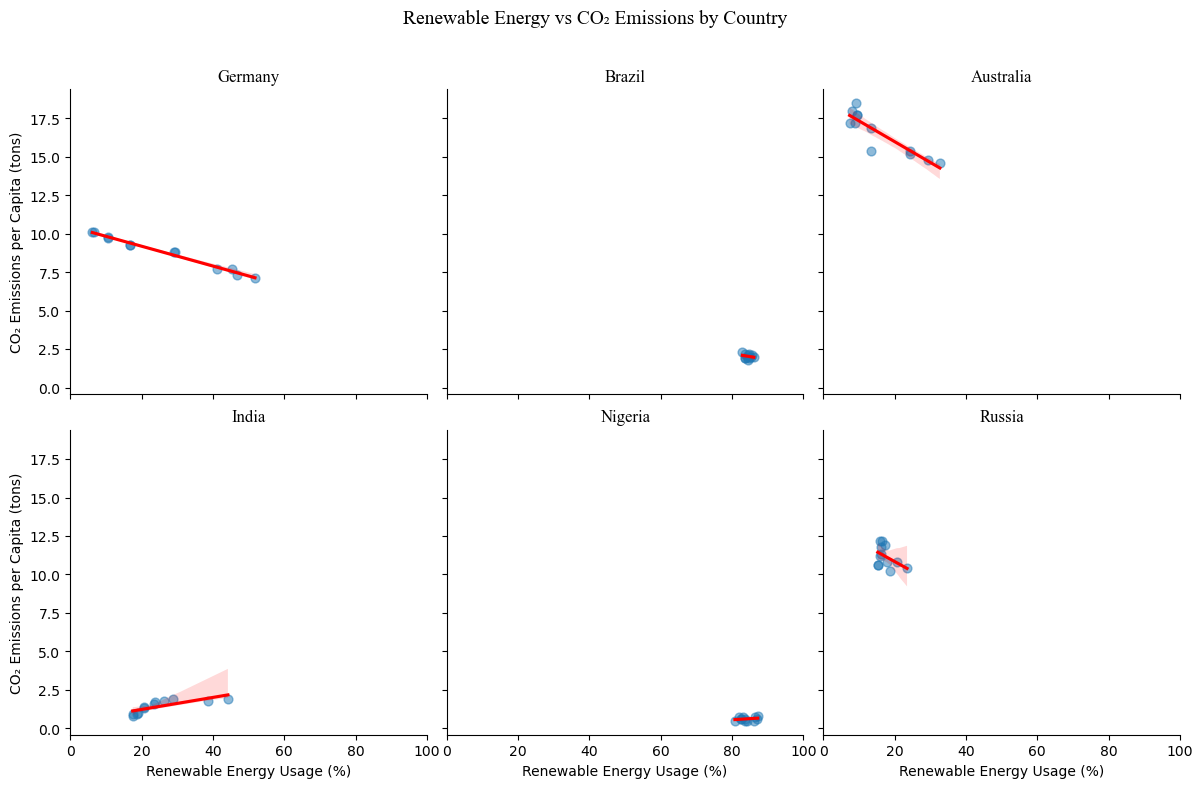

In [72]:
# Filter for top 6 countries with most data entries
top_countries = temperature_df['Country'].value_counts().nlargest(6).index
subset = temperature_df[temperature_df['Country'].isin(top_countries)]

# Create the faceted regression plots
g = sns.lmplot(
    data=subset,
    x='Renewable_Energy_pct',
    y='CO2_Emissions_tons_per_capita',
    col='Country',
    col_wrap=3,
    height=4,
    scatter_kws={'alpha': 0.5, 's': 40},
    line_kws={'color': 'red'}
)

# Update titles and labels
g.set_axis_labels("Renewable Energy Usage (%)", "CO₂ Emissions per Capita (tons)")
g.set_titles(col_template="{col_name}", size=12, fontname="Times New Roman")
g.fig.suptitle("Renewable Energy vs CO₂ Emissions by Country", fontsize=14, fontname="Times New Roman")
g.set(xlim=(0, 100))  # Optional: standardize x-axis if relevant

g.fig.subplots_adjust(top=0.88)
plt.show()

### Method

Ensure data richness in the analysis:
- Use top 6 countries with the most entries (years of data) are selected.
- Guards against misleading trends caused by limited data points.

<br> A Seaborn lmplot is used to create six separate regression plots, one for each selected country.
- X-axis: Renewable_Energy_pct
- Y-axis: CO2_Emissions_tons_per_capita
- Each subplot fits a linear regression line (in red) to highlight trends in the data.

<br> The scatter plot points (alpha=0.5, s=40) represent individual years. The transparency improves readability in dense areas.
<br> This faceted regression plot is designed to visually compare how renewable energy usage impacts CO₂ emissions across different national contexts. It reveals:
<br> Diverse relationships:
- Negative slopes → renewable usage likely contributing to emission reductions
- Flat slopes → minimal impact or data complexity
- Positive slopes (rare) → possible anomalies or opposing forces at play

<br> By keeping each country’s data separate and standardized, the chart facilitates deep insight into how different nations integrate renewable energy into their carbon strategies.

### Explanation

This figure presents linear regression plots for the top six countries with the most data entries in the dataset. Each subplot shows how that country’s renewable energy usage (%) relates to its CO₂ emissions per capita (tons) over time. The scatter points represent annual observations, and the red line is a regression fit to capture the trend. The x-axis is standardized from 0–100% for meaningful visual comparison between countries. Data transparency (alpha=0.5) helps reveal overlapping points and data density.
<br> Countries with a negative slope (e.g., Brazil or Norway) suggest that increasing renewable energy usage is associated with lower CO₂ emissions per capita, a sign of effective climate policies. In contrast, countries with a flat or positive slope may show no clear link between renewables and emissions, potentially due to:
- High industrial activity or fossil fuel exports
- Incomplete energy transitions
- Overreliance on non-renewable sources despite renewable growth

<br> Variations in slope direction and strength provide key insights into how effective renewable energy strategies are within national contexts.
<br> This visualization helps us go beyond global averages and ask:
- Are renewables actually reducing emissions where they’re deployed?
- How does this relationship vary across political, geographic, or economic boundaries?

<br> By breaking the data down by country, we uncover context-specific insights about energy policy effectiveness and climate outcomes, essential for shaping targeted interventions and strategies.